<a href="https://colab.research.google.com/github/franckbizimana/Wamungu/blob/main/Real_Estate_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [26]:
df.corr()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
price,1.000000,0.110680,0.558266,0.554583,0.387682,0.398615,0.486858,0.034159,0.185244,0.109144,-0.148108,-0.022207,-0.005428,0.322641,-0.322641
year_sold,0.110680,1.000000,-0.265243,-0.261875,-0.174329,-0.132903,-0.241073,-0.041976,-0.082122,-0.067985,0.068862,0.509384,0.287097,-0.136561,0.136561
property_tax,0.558266,-0.265243,1.000000,0.983430,0.544898,0.507861,0.640393,-0.080934,0.218076,0.182701,-0.208959,-0.121395,0.012119,0.449372,-0.449372
insurance,0.554583,-0.261875,0.983430,1.000000,0.479399,0.454178,0.569497,-0.145710,0.188731,0.135135,-0.173812,-0.120809,0.075054,0.410135,-0.410135
beds,0.387682,-0.174329,0.544898,0.479399,1.000000,0.640168,0.688634,-0.028209,0.228757,0.413082,-0.430083,-0.070744,-0.015989,0.658729,-0.658729
baths,0.398615,-0.132903,0.507861,0.454178,0.640168,1.000000,0.669070,0.188456,0.186494,0.344052,-0.197480,-0.057730,-0.213489,0.339109,-0.339109
sqft,0.486858,-0.241073,0.640393,0.569497,0.688634,0.669070,1.000000,0.234882,0.325832,0.270175,-0.270799,-0.078903,-0.284702,0.525699,-0.525699
year_built,0.034159,-0.041976,-0.080934,-0.145710,-0.028209,0.188456,0.234882,1.000000,0.022900,0.001779,0.105150,0.029828,-0.969108,-0.269514,0.269514
lot_size,0.185244,-0.082122,0.218076,0.188731,0.228757,0.186494,0.325832,0.022900,1.000000,0.061934,-0.092659,0.006077,-0.042227,0.250534,-0.250534
basement,0.109144,-0.067985,0.182701,0.135135,0.413082,0.344052,0.270175,0.001779,0.061934,1.000000,-0.198936,-0.047486,-0.018488,0.253299,-0.253299


In [3]:
df.shape

(1863, 15)

## Linear Regression Model

In [27]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [28]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234, stratify=x.property_type_Condo)

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 14), (1490,), (373, 14), (373,))

In [30]:
# train your model
lrmodel = LinearRegression().fit(x_train,y_train)

In [31]:
x_train.columns

Index(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Bunglow', 'property_type_Condo'],
      dtype='object')

In [15]:
lrmodel.coef_

array([ 7.39343051e+03, -5.52266645e+02,  2.61019578e+03,  6.40333989e+03,
        7.74544507e+03,  3.14482629e+01,  4.03830675e+03,  1.71898243e-01,
       -8.19442590e+03, -6.68356777e+03, -5.43848648e+04,  3.35512376e+03,
        1.07294801e+04, -1.07294801e+04])

In [16]:


# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [33]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 86076.93901722164


In [34]:
lrmodel.coef_

array([ 7.39343051e+03, -5.52266645e+02,  2.61019578e+03,  6.40333989e+03,
        7.74544507e+03,  3.14482629e+01,  4.03830675e+03,  1.71898243e-01,
       -8.19442590e+03, -6.68356777e+03, -5.43848648e+04,  3.35512376e+03,
        1.07294801e+04, -1.07294801e+04])

In [19]:
lrmodel.intercept_

-22707915.13773537

In [20]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 87401.08264872458


### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [35]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [36]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [37]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [38]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [39]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

64873.29931059558

## How do I know if my model is Overfitting or Generalised?

In [40]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [41]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61456.28000053516

## Plot the tree

In [42]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Bunglow', 'property_type_Condo'],
      dtype=object)

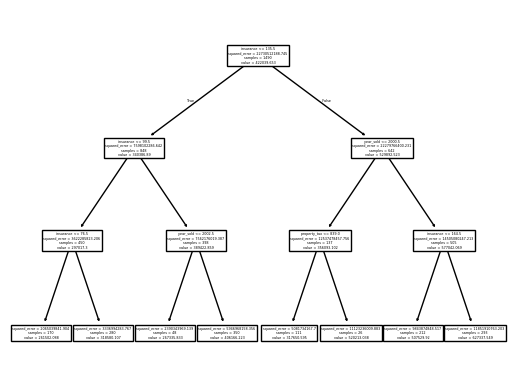

In [43]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [44]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [45]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [46]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [47]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [48]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [49]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

46803.387004021446

In [50]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [55]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(rfmodel, open('RE_Model','wb'))

In [56]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [57]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([254232.9])